决策树

In [1]:
import numpy as np
import matplotlib.pyplot as plt

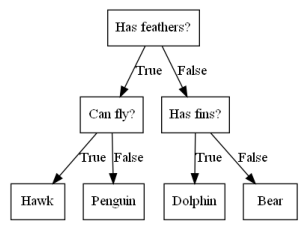

In [2]:
import mglearn

mglearn.plots.plot_animal_tree()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.937


In [4]:
"""
设置一定深度后停止树的展开
"""
tree_d4=DecisionTreeClassifier(max_depth=4,random_state=0)
tree_d4.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(tree_d4.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(tree_d4.score(X_test,y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.951


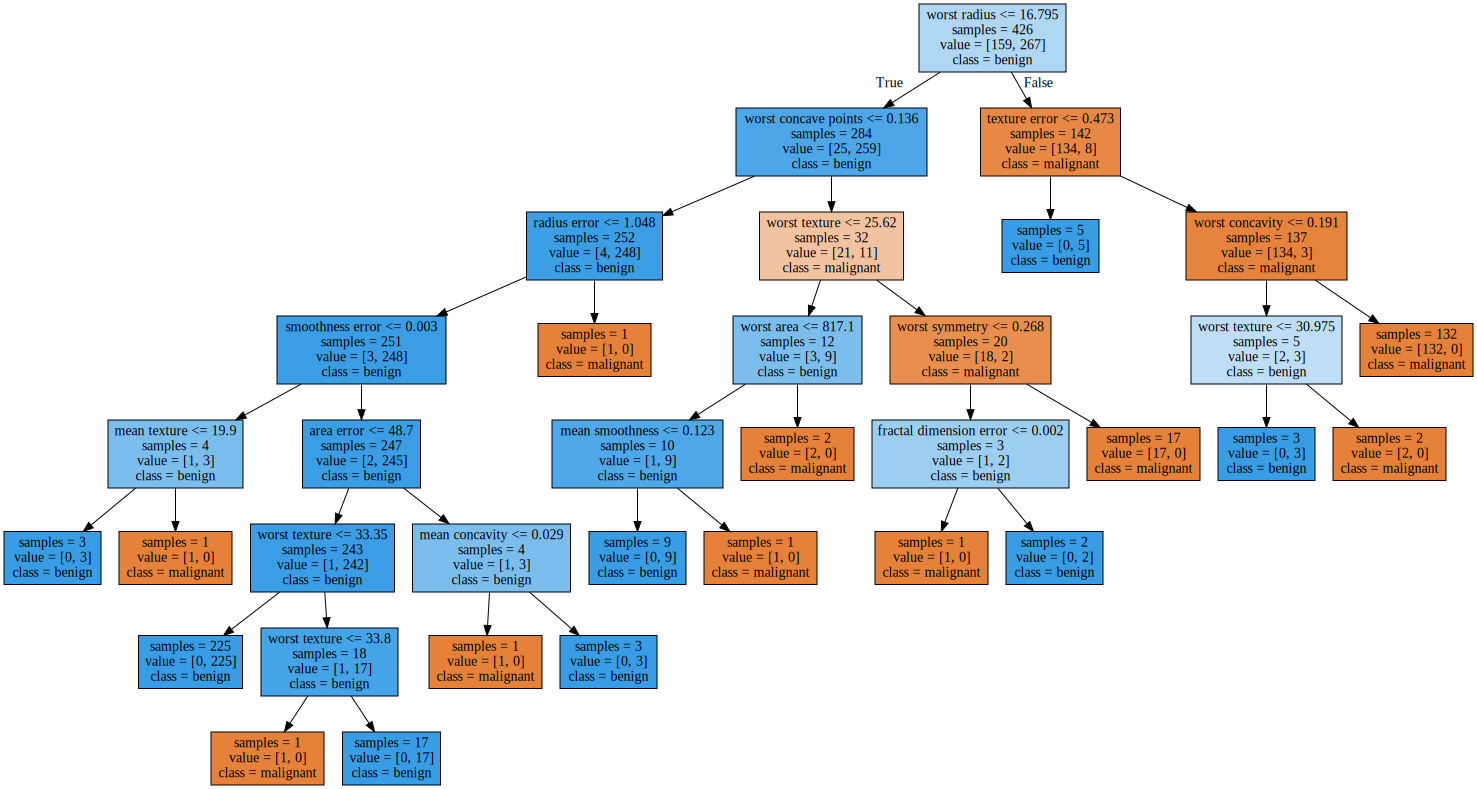

In [6]:
"""
获取决策树文件并展示
"""
from sklearn.tree import export_graphviz

export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],feature_names=cancer.feature_names,impurity=False,filled=True)
export_graphviz(tree_d4,out_file="tree_d4.dot",class_names=["malignant","benign"],feature_names=cancer.feature_names,impurity=False,filled=True)

# 可视化决策树
import graphviz

with open("tree.dot") as f:
    tree_dot_graph=f.read()
graphviz.Source(tree_dot_graph)

# with open("tree_d4.dot") as f:
#     tree_d4_dot_graph=f.read()
# graphviz.Source(tree_d4_dot_graph)

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


Text(0, 0.5, '特征')

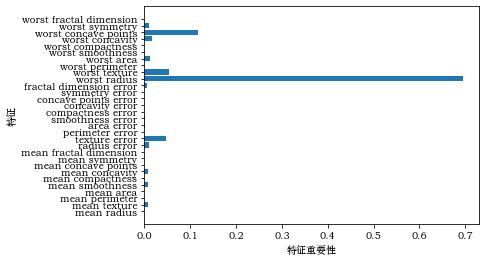

In [7]:
"""
树的 **特征重要性**
"""
print("Feature importances:\n{}".format(tree.feature_importances_))

# 获取特征数量
n_features=cancer.data.shape[1]
plt.barh(range(n_features),tree.feature_importances_,align="center")
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel("特征重要性")
plt.ylabel("特征")